<a href="https://colab.research.google.com/github/Prakash-63/new/blob/master/Scripts/adams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SafeDriveNet: Real-Time Edge-Optimized Driver Monitoring System on Edge Devices

#### Colab Setup

In [1]:
from google.colab import drive

drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
# drive.flush_and_unmount()

In [ ]:
!pip3 install ultralytics  ## installing ultralytics library for yolov8 object detection

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.1/722.1 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 59.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 80.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [ ]:
%cd /content/drive/MyDrive/ADAMS/Scripts/    ## all working scripts are stored in /ADAMS/Scripts folder

/content/drive/MyDrive/ADAMS/Scripts


### Importing Libraries

In [2]:
from IPython.display import Video
import subprocess
import glob
import time
import random
import os
import shutil
from pathlib import Path
import cv2
from ultralytics.utils.plotting import Annotator
import torch
import torchvision.transforms as T
import numpy as np
import matplotlib.pyplot as plt
import albumentations as A
from utils import *
from ultralytics import YOLO
import yaml
from PIL import Image
from YOLOv8 import *

ModuleNotFoundError: No module named 'ultralytics'

In [ ]:
!nvidia-smi

Sat Mar 23 14:21:54 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


## 2. Dataset Preparation

### 2.1 Data collection

##### We have placed our mobile phones behind the steering wheel of the car and have done the activities like drinking, drowsiness, inattentive, using mobile phone with and without wearing a seatbelt.

In [ ]:
Video("../Data/videos/wasim_in.MOV", embed=True)

### 2.2 Data Cleaning

#### 2.2.1 Converting videos to frames using ffmpeg

In [ ]:
def extracted_frames_from_video(video_path, output_dir, fps):

    print("converting {} video to folder {}  at fps {}".format(video_path, output_dir, fps))

    file_name = [x for x in video_path.split('/') if x[-4:] == '.MOV']
    frame_name = file_name[0][:-4]

    ### FFmpeg command to extract frames
    command = [
        'ffmpeg',
        '-i', video_path,
        '-vf', f'fps={fps}',
        f'{output_dir}/{frame_name}_%04d.jpg'
    ]

    # Execute the command
    try:
        subprocess.run(command, check=True)
        print(f"Frames extracted to {output_dir}")
    except subprocess.CalledProcessError as e:
        print(f"An error occurred: {e}")


video_files = glob.glob("../Data/dataset_videos/*") ## path to video dir

for i in video_files:
    extracted_frames_from_video(i, "../Data/imageData", 1)

converting ../Data/videos/wasim_in.MOV video to folder ../Data/imageData  at fps 1
Frames extracted to ../Data/imageData
converting ../Data/videos/aashish_in1.MOV video to folder ../Data/imageData  at fps 1
Frames extracted to ../Data/imageData
converting ../Data/videos/aashish_in2.MOV video to folder ../Data/imageData  at fps 1
Frames extracted to ../Data/imageData
converting ../Data/videos/aashish_in3.MOV video to folder ../Data/imageData  at fps 1
Frames extracted to ../Data/imageData


##### After converting videos to frames, we manually check images and removed if the images is blur or irrelevant for our project.

##### Once our dataset is cleaned, we annotate the data for object detection task. We used LabelImg for annotation, as it is open source and very handy to use it.


##### Our classes are :
                - seatbelt
                - no_seatbelt
                - drowsiness
                - drinking
                - mobile
                - inattentive

#### 2.2.2 Annotated images

##### Randomaly select 5 images and its bounding box labels (in text file) and display it

In [ ]:
our_classes = ["no_seatbelt", "mobile", "inattentive", "seatbelt", "drowsiness", "drinking"]

img_path = '../Data/Annotated_data/images'
label_path = '../Data/Annotated_data/labels'
randomaly_select_images = 5

all_img_files = glob.glob(img_path+"/*")

selected_img_files = random.sample(all_img_files, min(randomaly_select_images, len(all_img_files)))

selected_files_labels = []
for img_file in selected_img_files:
    base_name = Path(img_file).stem
    txt_file = base_name + '.txt'
    txt_file_path = label_path+'/'+txt_file
    selected_files_labels.append(txt_file_path)

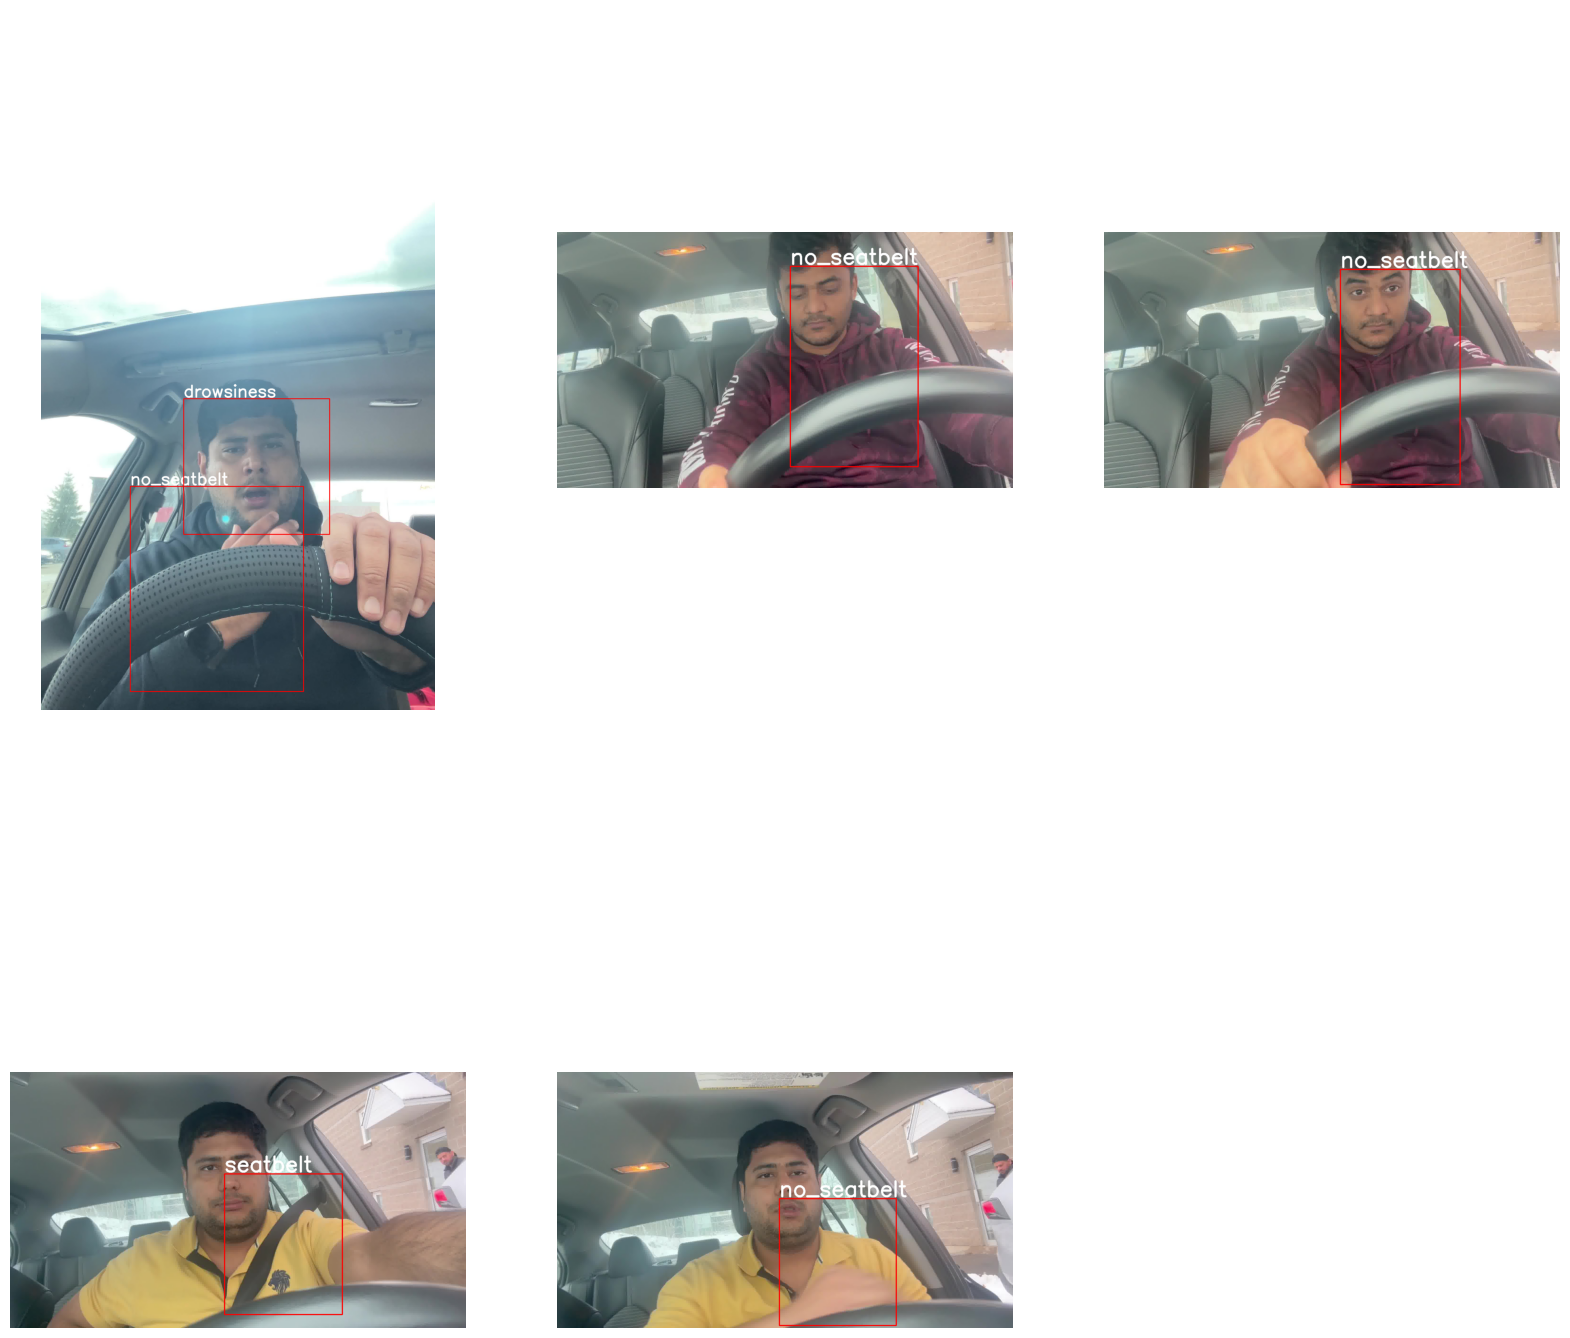

In [ ]:
n_images = len(selected_img_files)
plt.figure(figsize=(20, 20))

for idx, (img_path, label_path) in enumerate(zip(selected_img_files, selected_files_labels), start=1):
    img = cv2.imread(img_path)
    img_h, img_w = img.shape[:2]

    with open(label_path, 'r') as fr:
        lines = fr.read().splitlines()
        for line in lines:
            cls, x, y, w, h = map(float, line.split())

            # Convert YOLO format to bounding box
            bb = convert_yolo_labels_to_bbox((img_w, img_h), x, y, w, h)
            cv2.rectangle(img, (int(round(bb[0])), int(round(bb[2]))), (int(round(bb[1])), int(round(bb[3]))), (0, 0, 255), 3)
            cv2.putText(img, our_classes[int(cls)], (int(round(bb[0])), int(round(bb[2])) - 10), cv2.FONT_HERSHEY_SIMPLEX, 3, (255, 255, 255), 8, cv2.LINE_AA)

    # Convert BGR to RGB for display in opencv
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Add a subplot for each image
    ax = plt.subplot(2, 3, idx)
    ax.imshow(img_rgb)
    ax.axis('off')

# Show the plot
plt.show()


### 2.3 Data Augmentation <a id='augmentation_cell'></a>

##### In order to increase the data points, we have used the Albumentations library to augment 50% of training data. We have applied HorizontalFlip, RandomBrightnessContrast, CLAHE to the data.

##### Note: While doing data augmentation, we had an issue in generating augmentation data. We have report the issue in this jupyter notebook and also fixed the issue:https://github.com/albumentations-team/albumentations/issues/459#issuecomment-734454278

In [ ]:
img_path = '../Data/Annotated_data/images' ## annotated image dir
label_path = '../Data/Annotated_data/labels' ## annotated label dir

augment_img_dir = "../Data/augmentData/images" ## augmented image dir where output will store
augment_label_dir = "../Data/augmentData/labels" ## augmented label dir where output will store

In [ ]:
# !rm -rf ../Data/Annotated_data/images/*
# !rm -rf ../Data/augmentData/labels/*

In [ ]:
imgs = glob.glob(img_path+'/*')
selected_files_labels = glob.glob(label_path+'/*')
random.shuffle(selected_files_labels)

# 50% of training dataset
half_size = len(selected_files_labels) // 2    ## or int(len(data_list) * 0.20) for 20%




In [ ]:
### ISSUE : https://github.com/albumentations-team/albumentations/issues/459#issuecomment-734454278

def replace_function(file_path, old_function_str, new_function_str):
    with open(file_path, 'r') as file:
        content = file.read()

    if old_function_str not in content:
        raise ValueError("Old function not found in the file.")

    modified_content = content.replace(old_function_str, new_function_str)

    with open(file_path, 'w') as file:
        file.write(modified_content)

# Example usage
file_path = '/usr/local/lib/python3.10/dist-packages/albumentations/core/bbox_utils.py'  # Path to Python file

old_function_str = '''
def check_bbox(bbox: BoxType) -> None:
    """Check if bbox boundaries are in range 0, 1 and minimums are lesser then maximums"""
    for name, value in zip(["x_min", "y_min", "x_max", "y_max"], bbox[:4]):
        if not 0 <= value <= 1 and not np.isclose(value, 0) and not np.isclose(value, 1):
            raise ValueError(f"Expected {name} for bbox {bbox} to be in the range [0.0, 1.0], got {value}.")
    x_min, y_min, x_max, y_max = bbox[:4]
    if x_max <= x_min:
        raise ValueError(f"x_max is less than or equal to x_min for bbox {bbox}.")
    if y_max <= y_min:
        raise ValueError(f"y_max is less than or equal to y_min for bbox {bbox}.")
'''

new_function_str = '''
def check_bbox(bbox: BoxType) -> None:
    """Check if bbox boundaries are in range 0, 1 and minimums are lesser then maximums"""
    #my added block
    bbox=list(bbox)
    for i in range(4):
      if (bbox[i]<0) :
        bbox[i]=0
      elif (bbox[i]>1) :
        bbox[i]=1
    bbox=tuple(bbox)

    for name, value in zip(["x_min", "y_min", "x_max", "y_max"], bbox[:4]):
        if not 0 <= value <= 1 and not np.isclose(value, 0) and not np.isclose(value, 1):
            raise ValueError(f"Expected {name} for bbox {bbox} to be in the range [0.0, 1.0], got {value}.")
    x_min, y_min, x_max, y_max = bbox[:4]
    if x_max <= x_min:
        raise ValueError(f"x_max is less than or equal to x_min for bbox {bbox}.")
    if y_max <= y_min:
        raise ValueError(f"y_max is less than or equal to y_min for bbox {bbox}.")
'''

replace_function(file_path, old_function_str, new_function_str)


##### Once you run the above code (replace_function), please restart the kernel and re-run the libraries to load the updated file.
##### Note: you don't need to run the notebook from the beginning, just run the notebook from [ Data Augmentation Cell](#augmentation_cell)

In [ ]:
for yolo_str_labels in selected_files_labels[:half_size]:
    print(yolo_str_labels)
    img_base_name = Path(yolo_str_labels).stem
    img_file = img_base_name + '.jpg'
    img_file_path = img_path+'/'+img_file


    image = cv2.imread(img_file_path)
    labels_read = open(yolo_str_labels, "r").read()

    lines = [line.strip() for line in labels_read.split("\n") if line.strip()]
    # print(lines)
    album_bb_lists = augment_bbox_multiclass("\n".join(lines), our_classes) if len(lines) > 1 else [augment_bbox_singleclass("\n".join(lines), our_classes)]

    transform = A.Compose([
        # A.RandomCrop(width=300, height=300),
        A.HorizontalFlip(p=1),
        A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0),
        A.CLAHE(clip_limit=(0, 1), tile_grid_size=(8, 8), always_apply=True),
        # A.Resize(300, 300)
    ], bbox_params=A.BboxParams(format='yolo'))

    transformed = transform(image=image, bboxes=album_bb_lists)

    transformed_image, transformed_bboxes = transformed['image'], transformed['bboxes']

    transform_bbox_num = len(transformed_bboxes)

    if transform_bbox_num:
        trans_bboxes = multi_bbox_to_yolo(transformed_bboxes, our_classes) if transform_bbox_num > 1 else [single_bbox_to_yolo(transformed_bboxes[0], our_classes)]

    if not any(element < 0 for row in trans_bboxes for element in row):
        lab_out_pth = os.path.join(augment_label_dir, "aug_"+img_base_name+".txt")
        with open(lab_out_pth, 'w') as output:
            for bbox in trans_bboxes:
                updated_bbox = str(bbox).replace(',', '').replace('[', '').replace(']', '')
                output.write(updated_bbox + '\n')

    out_img_path = os.path.join(augment_img_dir, "aug_"+img_file)
    cv2.imwrite(out_img_path, transformed_image)

    print("Processed : Image : {}".format(out_img_path))

../Data/Annotated_data/labels/Tb1_out122.txt
Processed : Image : ../Data/augmentData/images/aug_Tb1_out122.jpg
../Data/Annotated_data/labels/aashish_out31.txt
Processed : Image : ../Data/augmentData/images/aug_aashish_out31.jpg
../Data/Annotated_data/labels/Tb1_out8.txt
Processed : Image : ../Data/augmentData/images/aug_Tb1_out8.jpg
../Data/Annotated_data/labels/out51.txt
Processed : Image : ../Data/augmentData/images/aug_out51.jpg
../Data/Annotated_data/labels/Tb2_out51.txt
Processed : Image : ../Data/augmentData/images/aug_Tb2_out51.jpg
../Data/Annotated_data/labels/Tb2_out56.txt
Processed : Image : ../Data/augmentData/images/aug_Tb2_out56.jpg
../Data/Annotated_data/labels/Tb1_out89.txt
Processed : Image : ../Data/augmentData/images/aug_Tb1_out89.jpg
../Data/Annotated_data/labels/Tb1_out70.txt
Processed : Image : ../Data/augmentData/images/aug_Tb1_out70.jpg
../Data/Annotated_data/labels/out1.txt
Processed : Image : ../Data/augmentData/images/aug_out1.jpg
../Data/Annotated_data/labels

##### Randomaly select 5 augmented images and its bounding box labels (in text file) and display it

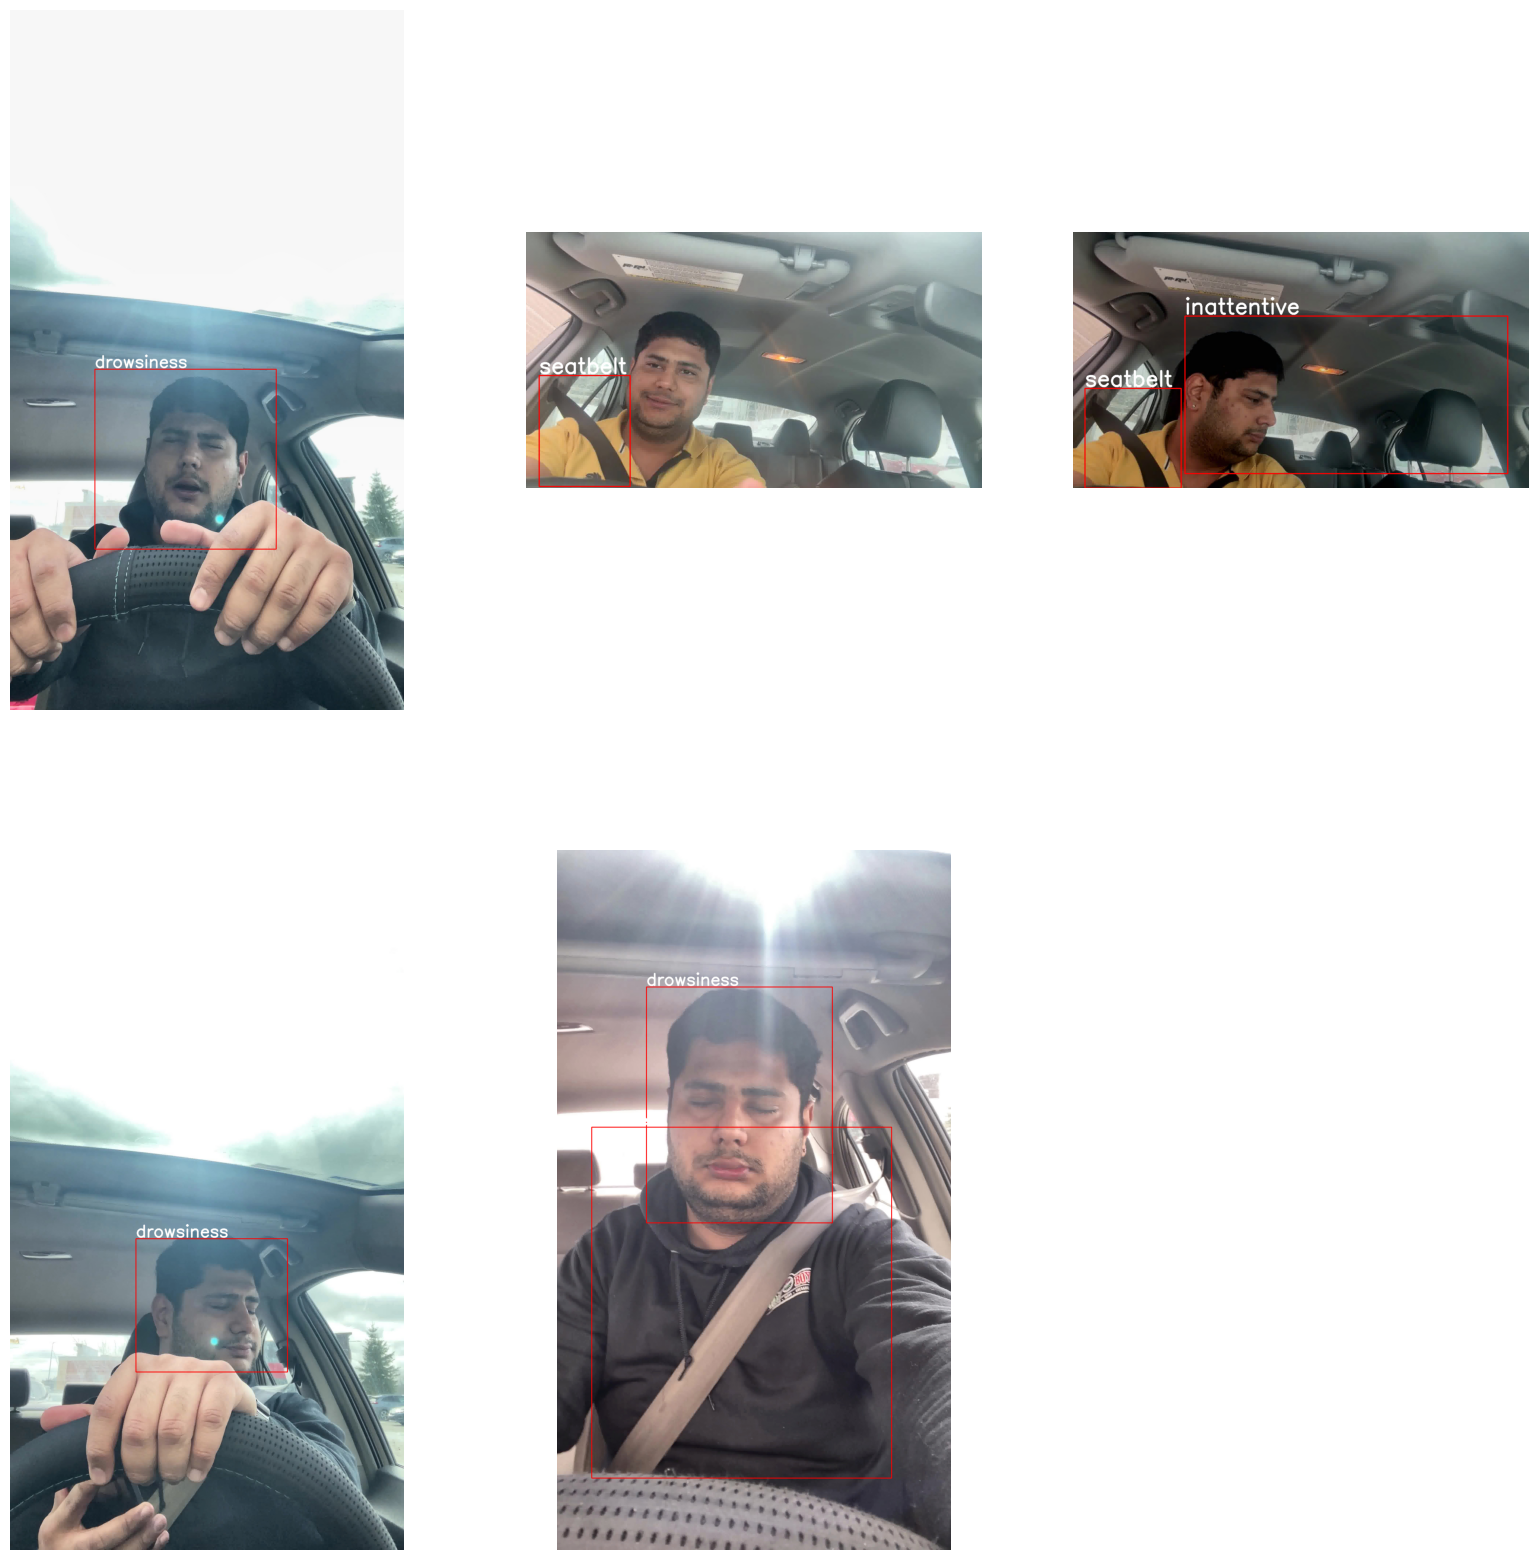

In [ ]:
img_path = '../Data/augmentData/images'
label_path = '../Data/augmentData/labels'
randomaly_select_images = 5

all_img_files = glob.glob(img_path+"/*")

selected_img_files = random.sample(all_img_files, min(randomaly_select_images, len(all_img_files)))

selected_files_labels = []
for img_file in selected_img_files:
    base_name = Path(img_file).stem
    txt_file = base_name + '.txt'
    txt_file_path = label_path+'/'+txt_file
    selected_files_labels.append(txt_file_path)

n_images = len(selected_img_files)
plt.figure(figsize=(20, 20))

for idx, (img_path, label_path) in enumerate(zip(selected_img_files, selected_files_labels), start=1):
    img = cv2.imread(img_path)
    img_h, img_w = img.shape[:2]

    with open(label_path, 'r') as fr:
        lines = fr.read().splitlines()
        for line in lines:
            cls, x, y, w, h = map(float, line.split())

            # Convert YOLO format to bounding box
            bb = convert_yolo_labels_to_bbox((img_w, img_h), x, y, w, h)
            cv2.rectangle(img, (int(round(bb[0])), int(round(bb[2]))), (int(round(bb[1])), int(round(bb[3]))), (0, 0, 255), 3)
            cv2.putText(img, our_classes[int(cls)], (int(round(bb[0])), int(round(bb[2])) - 10), cv2.FONT_HERSHEY_SIMPLEX, 3, (255, 255, 255), 8, cv2.LINE_AA)

    # Convert BGR to RGB for display in opencv
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Add a subplot for each image
    ax = plt.subplot(2, 3, idx)
    ax.imshow(img_rgb)
    ax.axis('off')

# Show the plot
plt.show()

##### Once we have annotated data and augmented data, we stored them in data dir.

In [ ]:
### augmented data and annotated dataset are copied in data dir

!cp -r ../Data/Annotated_data/images/* ../Data/data/images/
!cp -r ../Data/Annotated_data/labels/* ../Data/data/labels/

!cp -r ../Data/augmentData/images/* ../Data/data/images/
!cp -r ../Data/augmentData/labels/* ../Data/data/labels/

In [ ]:
# !rm -rf ../Data/data/images/*
# !rm -rf ../Data/data/labels/*

In [ ]:
# !rm -rf ../Data/training

### 2.4 Train, Test, Val Split

##### All the training images and its labels are stored in the data dir.

In [ ]:
total_img = "../Data/data/images/"
total_label = "../Data/data/labels/"

In [ ]:
all_img_files = glob.glob(total_img+"/*")

#### Shuffle the list
random.shuffle(all_img_files)

# Split file names into train, val, and test sets
total_imgs = len(all_img_files)
train_end = int(total_imgs * 0.7) ## For training: 70% of all the data
val_end = train_end + int(total_imgs * 0.2) ## For validation: 20% of all the data


train_files_images = all_img_files[:train_end]
val_files_images = all_img_files[train_end:val_end]
test_files_images = all_img_files[val_end:]   # For testing: remaining 10%

train_files_labels = []
for img_file in train_files_images:
    base_name = Path(img_file).stem
    txt_file = base_name + '.txt'
    txt_file_path = total_label+'/'+txt_file
    train_files_labels.append(txt_file_path)

val_files_labels = []
for img_file in val_files_images:
    base_name = Path(img_file).stem
    txt_file = base_name + '.txt'
    txt_file_path = total_label+'/'+txt_file
    val_files_labels.append(txt_file_path)

test_files_labels = []
for img_file in test_files_images:
    base_name = Path(img_file).stem
    txt_file = base_name + '.txt'
    txt_file_path = total_label+'/'+txt_file
    test_files_labels.append(txt_file_path)

try:
    os.mkdir("../Data/training")

    os.mkdir("../Data/training/train/")
    os.mkdir("../Data/training/train/images")
    os.mkdir("../Data/training/train/labels")

    os.mkdir("../Data/training/val/")
    os.mkdir("../Data/training/val/images")
    os.mkdir("../Data/training/val/labels")

    os.mkdir("../Data/training/test/")
    os.mkdir("../Data/training/test/images")
    os.mkdir("../Data/training/test/labels")


except OSError as error:
    print(error)



In [ ]:
for img, label in zip(train_files_images, train_files_labels):
    shutil.copy(img,"../Data/training/train/images")
    shutil.copy(label,"../Data/training/train/labels")

for img, label in zip(val_files_images, val_files_labels):
    shutil.copy(img,"../Data/training/val/images")
    shutil.copy(label,"../Data/training/val/labels")

for img, label in zip(test_files_images, test_files_labels):
    shutil.copy(img,"../Data/training/test/images")
    shutil.copy(label,"../Data/training/test/labels")

##### Till now, 70% of data is stored in train dir, 20% of data is stored in val dir, 10% of data is stored in test dir. Our data is prepared for training.

## 3. Training and Fine-tuning

### 3.1 Yolov8 Framework from ultralytics

#### 3.1.1 Configure Yolo training pipeline

##### In order to run the Yolo training pipeline, we need to create the YAML file in which number of classes, names of classes, path to training dir, validation dir, testing dir are defined.

In [ ]:
our_classes = ["no_seatbelt", "mobile", "inattentive", "seatbelt", "drowsiness", "drinking"]
data = {
    'names': our_classes,
    'nc': 6,
    'train': "/content/drive/MyDrive/ADAMS/Data/training/train/images",
    'val' : "/content/drive/MyDrive/ADAMS/Data/training/val/images",
    'test' : "/content/drive/MyDrive/ADAMS/Data/training/test/images"

}

# Open a file and write the YAML
with open('../config/data.yaml', 'w') as file:
    yaml.dump(data, file, default_flow_style=False)

##### Once we create the YAML file, we download the pretrained yolov8m model from the Ultralytics.

In [ ]:
# Download and Load a model
model = YOLO('../yolo_pretrainedweights/yolov8m.pt') # download yolov8 pretrained weights to yolo_pretrainedweights directory

100%|██████████| 49.7M/49.7M [00:00<00:00, 153MB/s]


###### we are checking if gpu is available or not

In [ ]:
torch.cuda.is_available()

True

##### We wrote CLI command to run the training pipeline, where we have defined the data.yaml which we created in above cell, pretrained model, we set epochs to 25, image size is 640, plot=True to visualize the train/val results, device=0 to run on gpu.

In [ ]:
## Train

!yolo detect train data='../config/data.yaml' model="../yolo_pretrainedweights/yolov8m.pt" epochs=25 imgsz=640 plots=True device=0

Ultralytics YOLOv8.1.31 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=../yolo_pretrainedweights/yolov8m.pt, data=../config/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train10, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sho

### Model Performance

##### Yolov8 library saves the visualization charts in run/detect/train dir.

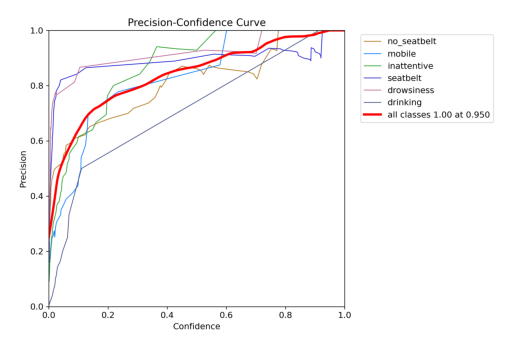

In [ ]:
precision_img = cv2.imread("./runs/detect/train10/P_curve.png")
plt.imshow(precision_img)
plt.axis('off')
plt.show()

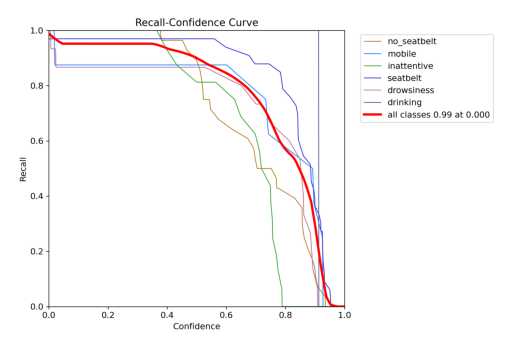

In [ ]:
recall_img = cv2.imread("./runs/detect/train10/R_curve.png")
plt.imshow(recall_img)
plt.axis('off')
plt.show()

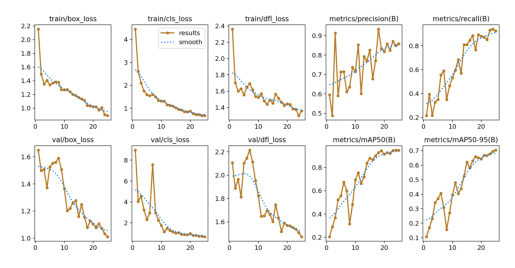

In [ ]:
result_img = cv2.imread("./runs/detect/train10/results.png")
plt.imshow(result_img)
plt.axis('off')
plt.show()

### Model Output on public available dataset

##### We have downloaded the public dataset from of Driving Monitoring Dataset (DMD) (https://dmd.vicomtech.org/) from Roboflow website (https://universe.roboflow.com/drivermonitoring/driver-atention/dataset/4).

###### We run our trained model on public dataset and showed prediction.

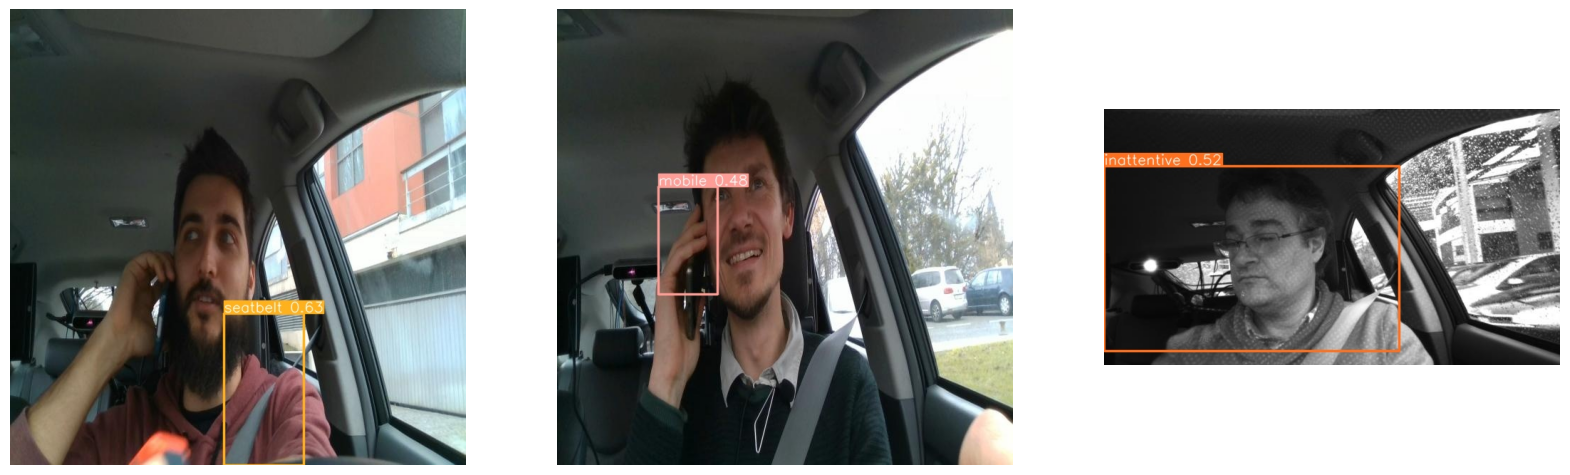

In [ ]:
def load_images_from_folder(folder, num_images=3):
    images = []
    for filename in folder:
        if len(images) < num_images:
            img = Image.open(filename)
            if img is not None:
                images.append(img)
        else:
            break
    return images

def display_images(images):
    fig, axs = plt.subplots(1, len(images), figsize=(20, 20))

    for i, img in enumerate(images):
        axs[i].imshow(img)
        axs[i].axis('off')

    plt.show()


folder_path = '../Data/result/*.jpg'
image = glob.glob(folder_path)
images = load_images_from_folder(image)
display_images(images)

### Export

##### We are converting our pytorch model to onnx for evaluating the baseline with optimize model

In [ ]:
model = YOLO('../saved_models/best_v03.pt')  # load an trained model

# Export the model
model.export(format='onnx')

Ultralytics YOLOv8.1.27 🚀 Python-3.9.6 torch-2.2.1 CPU (Apple M2)
Model summary (fused): 218 layers, 25843234 parameters, 0 gradients, 78.7 GFLOPs

PyTorch: starting from '../saved_models/best_v04.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 10, 8400) (49.6 MB)

ONNX: starting export with onnx 1.15.0 opset 17...
ONNX: export success ✅ 2.0s, saved as '../saved_models/best_v04.onnx' (98.8 MB)

Export complete (3.3s)
Results saved to /Users/aashishmamgain/Downloads/TME/Project/ADAMS/saved_models
Predict:         yolo predict task=detect model=../saved_models/best_v04.onnx imgsz=640  
Validate:        yolo val task=detect model=../saved_models/best_v04.onnx imgsz=640 data=../config/data.yaml  
Visualize:       https://netron.app


'../saved_models/best_v04.onnx'

### Integration with Downstream Pipeline - Inference

##### For Downstream pipeline, we have classify the distraction level based on the detected classes and assign a score/threshold to each class based on how distracting it is.

##### Class score - Threshold :
                - seatbelt    : 0
                - no_seatbelt : 0.7
                - drowsiness  : 0.7
                - drinking    : 0.5
                - mobile      : 0.6
                - inattentive : 0.8

##### Distraction Level :
                - if total_score < 0.5:
                    return 'No Distraction'
                - elif total_score < 1.0:
                    return 'Moderate Distraction'
                - else:
                    return 'Severe Distraction'

##### Also, we have grouped our 6 classes into 3 super-classes. For example, classes like "seatbelt" and "no_seatbelt" are combined to "Seat Belt", classes like "drinking", "inattentive", and "mobile" are combined to "Inattentiveness". Class "drowsiness" remains same, named as "Drowsiness".

##### We also saving CSV file with warning status of a driver. The csv file contains the Driver ID, Frame number, our three super-classes stating driver behaviour in boolean (True/False)
![image.png](attachment:882fd504-f445-416d-a495-56c1a0f3dd71.png)

In [ ]:
cap = cv2.VideoCapture("../Data/test_video/aashish_in2.mp4")
rame_num = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_writer = cv2.VideoWriter('../Output/test.mp4',fourcc,30,(frame_width,frame_height))

In [ ]:
# Initialize YOLOv7 object detector
model_path = "../saved_models/best_v03.onnx"
yolov8_detector = YOLOv8(model_path, conf_thres=0.3, iou_thres=0.3)


total_time_op = 0
frame_count = 0
cv2.startWindowThread()
cv2.namedWindow("Detected Objects", cv2.WINDOW_NORMAL)


while cap.isOpened():

    # Read frame from the video
    ret, frame = cap.read()

    if ret == True:
        start_time = time.time()
        # Update object localizer
        boxes, scores, class_ids = yolov8_detector(frame)

        combined_img = yolov8_detector.draw_detections(frame)


        end_time = time.time()
        total_time_op += (end_time - start_time)
        frame_count += 1

        cv2.imshow("Detected Objects", combined_img)
        video_writer.write(combined_img)



        # Press key q to stop
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break


cap.release()
video_writer.release()
cv2.waitKey(1)
cv2.destroyAllWindows()
cv2.waitKey(1)

if total_time_op > 0:
    fps_op = frame_count / total_time_op
else:
    fps_op = 0
print(f"FPS of optimized model on test video: {fps_op:.2f}")
print(f"Inference time of optimized model on test video: {total_time_op:.2f} seconds")

2024-04-08 19:17:54.777684 [W:onnxruntime:, coreml_execution_provider.cc:81 GetCapability] CoreMLExecutionProvider::GetCapability, number of partitions supported by CoreML: 11 number of nodes in the graph: 299 number of nodes supported by CoreML: 287


FPS of optimized model on test video: 19.36
Inference time of optimized model on test video: 75.92 seconds


## Basemodel (Pytorch) vs Optimize Model (Onnx model) ---> Evaluting inference time

In [ ]:
def load_model(model_path):
    model = YOLO(model_path)
    return model

In [ ]:
def infer_on_video(video_path, model):
    # Open the video
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error: Could not open video.")
        return

    total_time = 0
    frame_count = 0
    cv2.startWindowThread()
    while cap.isOpened():
        ret, frame = cap.read()

        if ret == True:
            frame1 = frame.copy()
            start_time = time.time()

            with torch.no_grad():
                predictions = model.predict(frame, conf=0.30)


                for pred in predictions:
                    annotator = Annotator(frame)
                    boxes = pred.boxes
                    for box in boxes:
                        b = box.xyxy[0]  # get box coordinates in (left, top, right, bottom) format
                        c = box.cls
                        annotator.box_label(b, model.names[int(c)])


                img = annotator.result()

            end_time = time.time()
            total_time += (end_time - start_time)
            frame_count += 1

            # Display the resulting frame
            cv2.imshow('Frame', img)

            # Press Q on keyboard to exit
            key = cv2.waitKey(25)
            # if cv2.waitKey(25) & 0xFF == ord('q'):
            if key == ord('n') or key == ord('p'):
                break
        else:
            break

    # When everything done, release the video capture object
    cap.release()
    cv2.waitKey(1)
    cv2.destroyAllWindows()
    cv2.waitKey(1)

    if total_time > 0:
        fps = frame_count / total_time
    else:
        fps = 0
    print(f"FPS of basemodel on test video: {fps:.2f}")
    print(f"Inference time of optimized model on test video: {total_time:.2f} seconds")

    return fps, total_time

In [ ]:
# Load the model
model_path = "../saved_models/best_v03.pt"  # Baseline model
model = load_model(model_path)

In [ ]:
# Run inference on a video
video_path = "../Data/test_video/aashish_in2.mp4"  # Replace with your video path
f, tt = infer_on_video(video_path, model)


0: 640x384 1 no_seatbelt, 1 inattentive, 274.6ms
Speed: 7.2ms preprocess, 274.6ms inference, 12.8ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 no_seatbelt, 1 inattentive, 276.8ms
Speed: 2.1ms preprocess, 276.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 no_seatbelt, 1 inattentive, 271.4ms
Speed: 3.3ms preprocess, 271.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 no_seatbelt, 1 inattentive, 228.9ms
Speed: 1.6ms preprocess, 228.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 no_seatbelt, 1 inattentive, 249.8ms
Speed: 1.7ms preprocess, 249.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 no_seatbelt, 1 inattentive, 223.1ms
Speed: 1.9ms preprocess, 223.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 no_seatbelt, 1 inattentive, 210.2ms
Speed: 1.8ms preprocess, 210.2ms inference, 0.3ms postprocess

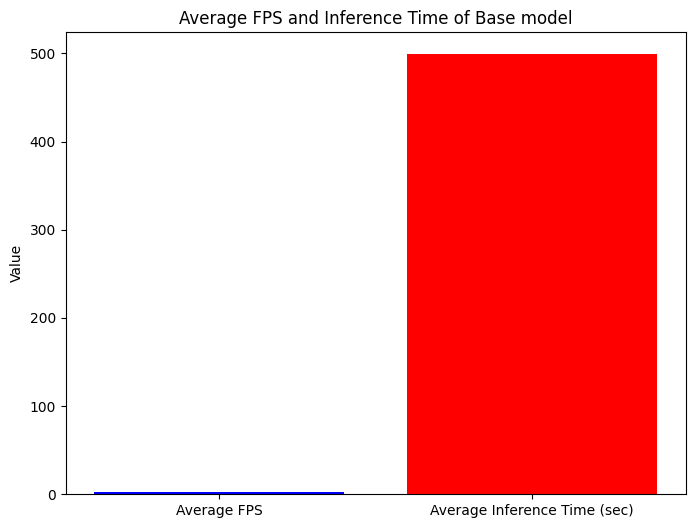

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(['Average FPS', 'Average Inference Time (sec)'], [f, tt], color=['blue', 'red'])
plt.ylabel('Value')
plt.title('Average FPS and Inference Time of Base model')
plt.show()

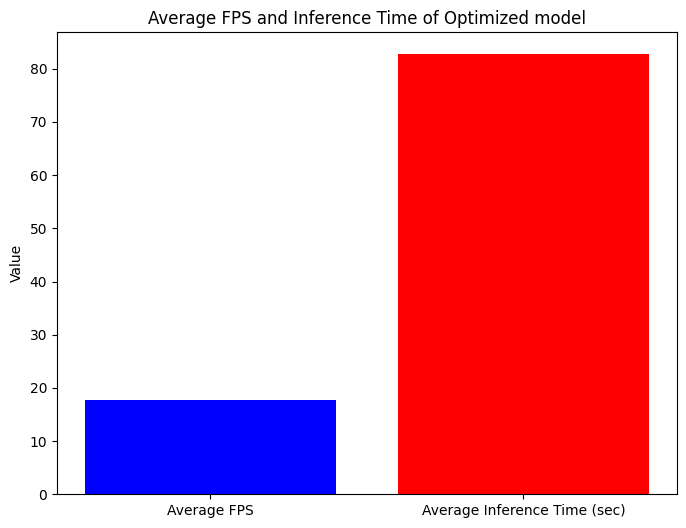

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(['Average FPS', 'Average Inference Time (sec)'], [fps_op, total_time_op], color=['blue', 'red'])
plt.ylabel('Value')
plt.title('Average FPS and Inference Time of Optimized model')
plt.show()

### The optimized model not only processes video data at a significantly higher FPS but also reduces the inference time by over 80%, marking a critical step forward in deploying real-time monitoring systems on edge devices.